In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/users/Marco/OneDrive/Documents/stock_data.csv", delimiter=',', on_bad_lines='skip')
print(data.shape)
print(data.sample(7))

(619040, 7)
              date    open      high     low   close   volume   Name
571293  2013-03-19   72.62   72.6697   71.56   72.31   287418    VAR
595328  2016-07-26   23.55   23.8500   23.36   23.56  6192242    WMB
594516  2013-05-06   37.52   37.6700   37.22   37.30  5798320    WMB
540663  2013-05-30   87.53   89.1000   87.41   88.76  1846663    TMO
90444   2016-09-26  144.52  144.9600  144.00  144.18  2863732  BRK.B
332015  2017-01-13   41.00   41.0400   40.69   40.88  8123494     KO
62826   2013-03-21  125.84  126.9400  125.40  125.45   603215    AVB


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [4]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


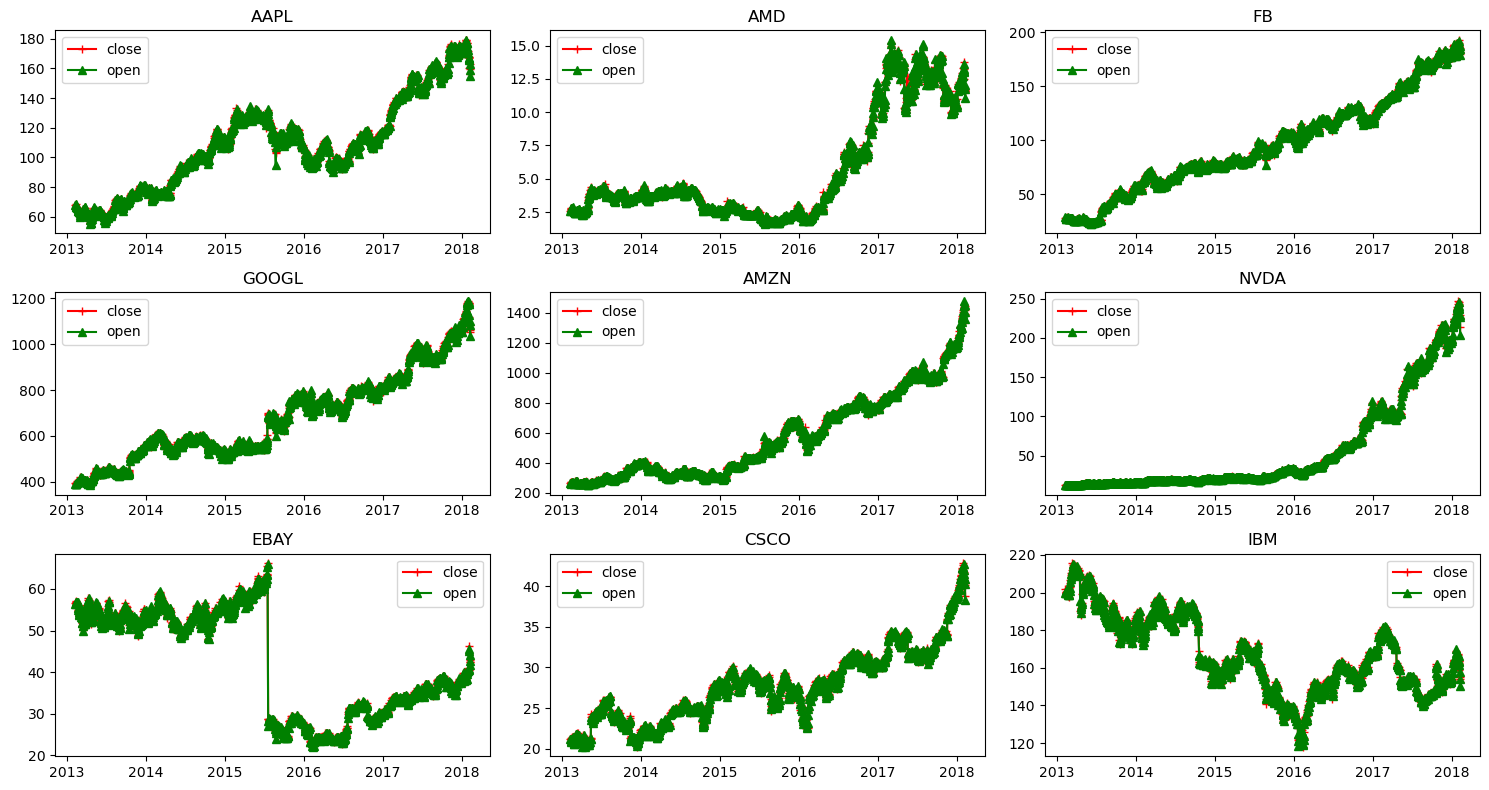

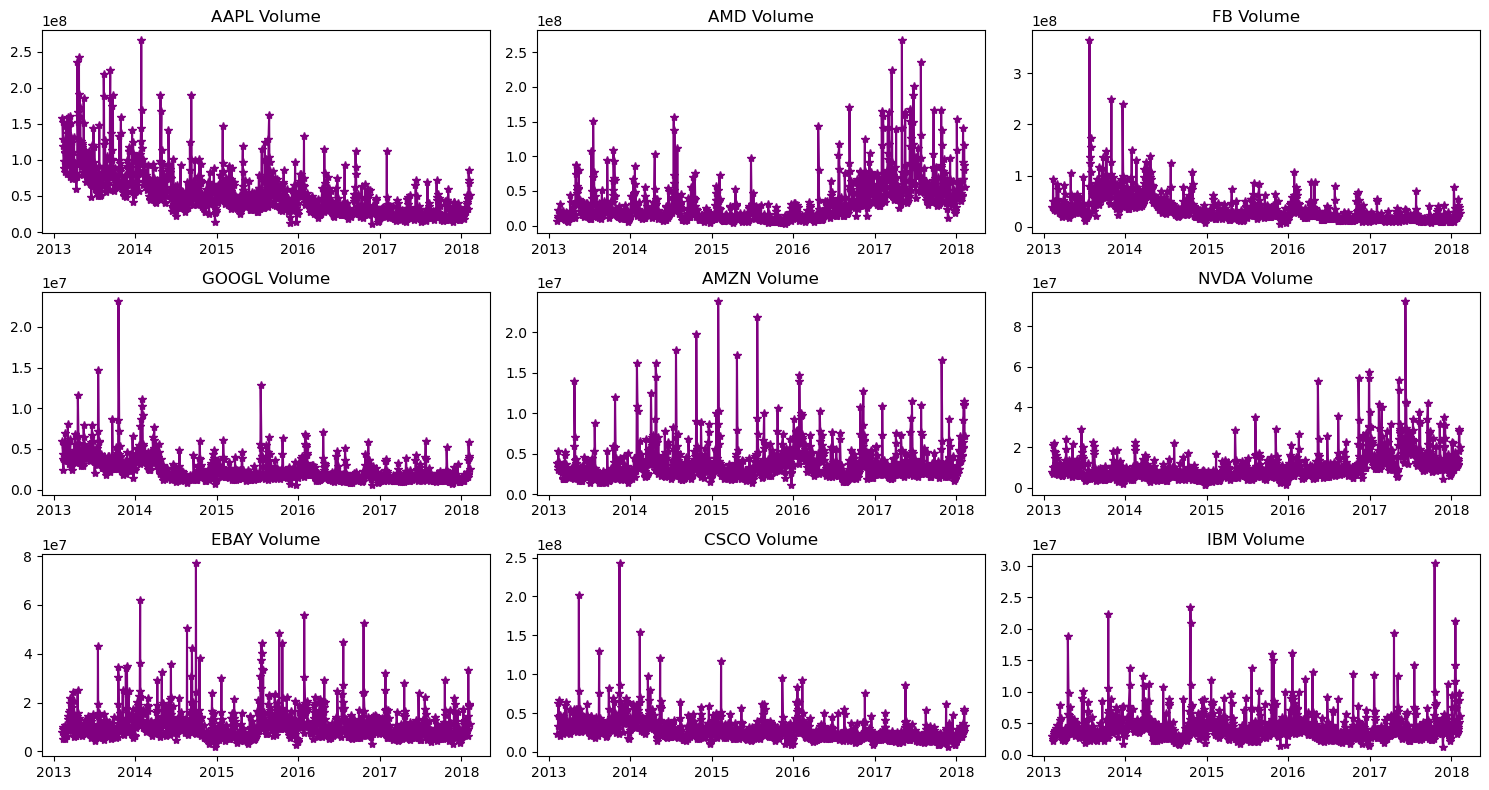

In [5]:
companies = ['AAPL', 'AMD', 'FB', 'GOOGL', 'AMZN', 'NVDA', 'EBAY', 'CSCO', 'IBM']

plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['date'], c['close'], c="r", label="close", marker="+")
    plt.plot(c['date'], c['open'], c="g", label="open", marker="^")
    plt.title(company)
    plt.legend()
    plt.tight_layout()

plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['date'], c['volume'], c='purple', marker='*')
    plt.title(f"{company} Volume")
    plt.tight_layout()

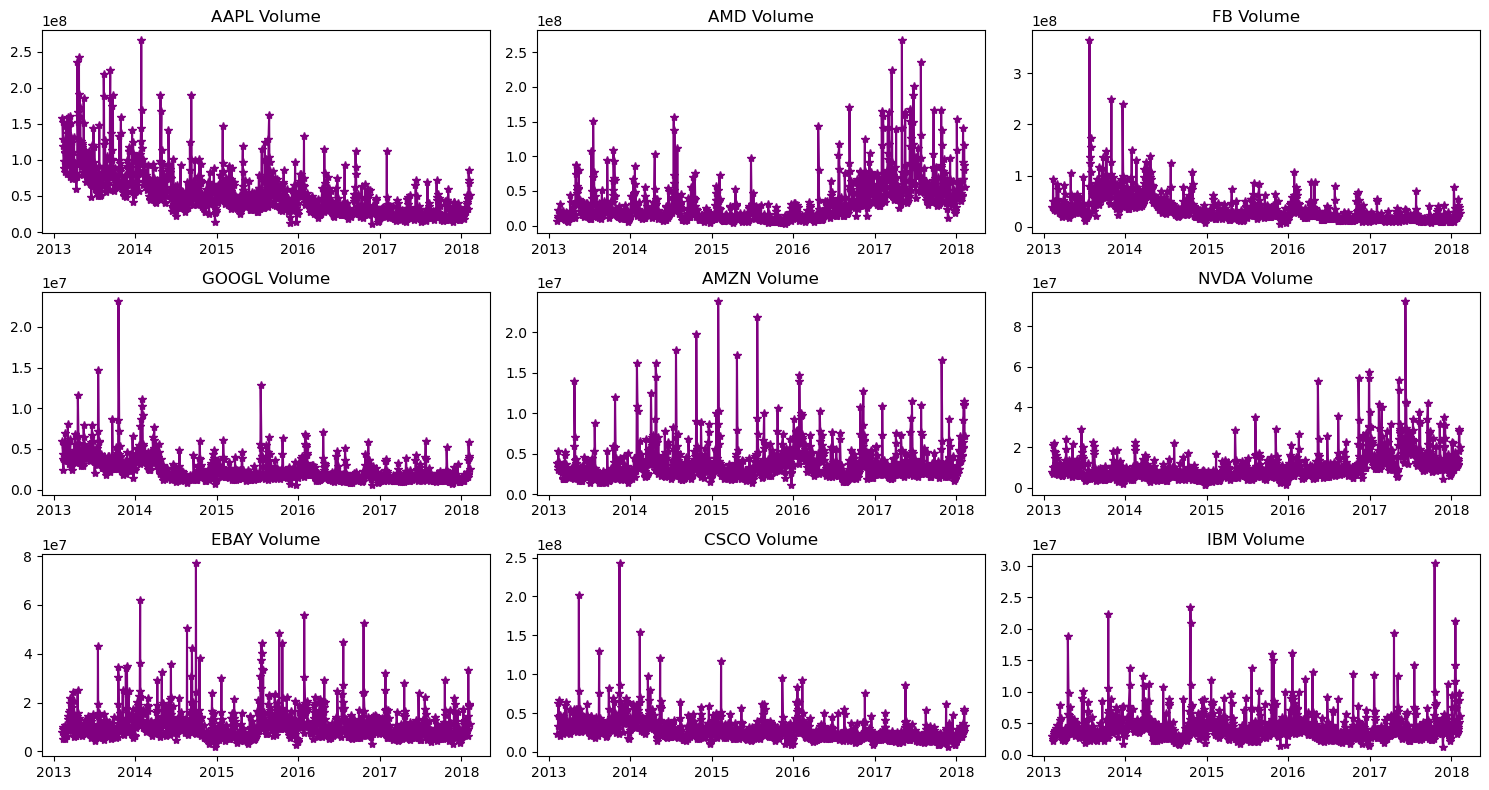

In [6]:
plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['date'], c['volume'], c='purple', marker='*')
    plt.title(f"{company} Volume")
    plt.tight_layout()

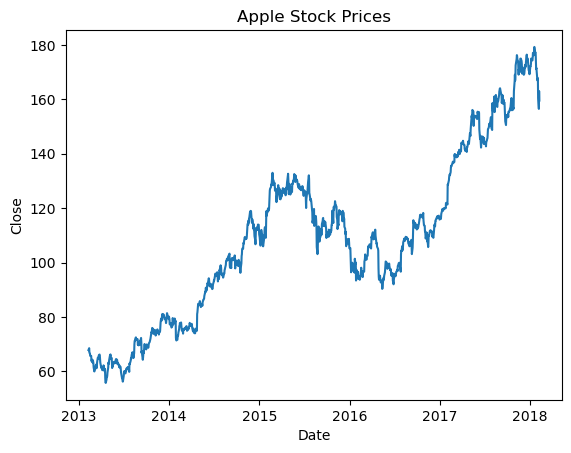

In [7]:
apple = data[data['Name'] == 'AAPL']
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1))
 & (apple['date']<datetime(2018,1,1))]
plt.plot(apple['date'],apple['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()

In [8]:
close_data = apple.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)

1197


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [11]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0801
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0126
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0110
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0094
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0075
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0081
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0081
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0058
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0066
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0064


In [12]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

mse = np.mean(((predictions - y_test) ** 2))
rmse = np.sqrt(mse)

print("MSE", mse)
print("RMSE", np.sqrt(mse))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
MSE 31.811533343369955
RMSE 5.640171393084607


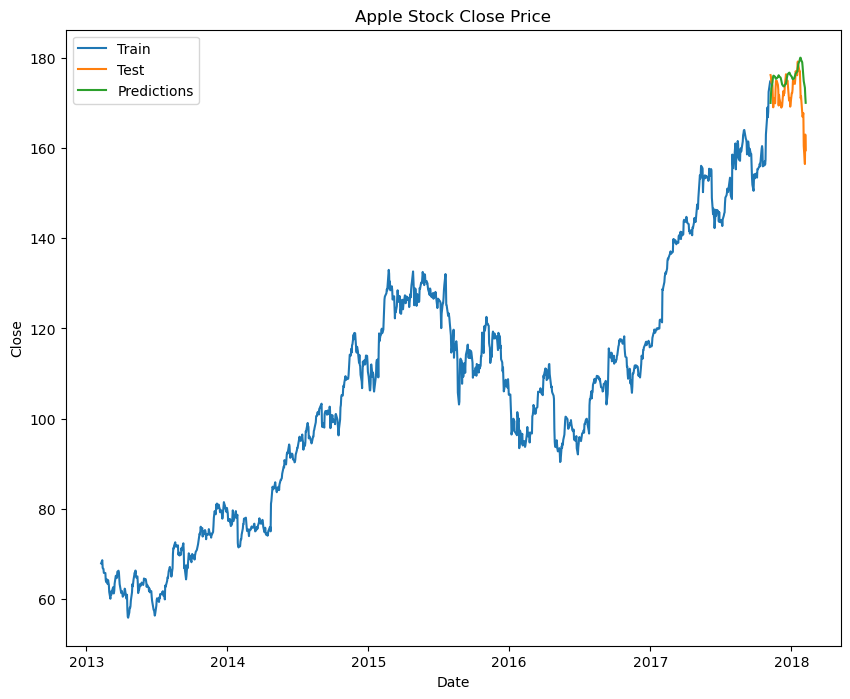

In [13]:
train = apple[:training]
test = apple[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])